In [56]:
import numpy as np

def TransitionMatrix(matrix: list) -> np.ndarray:
    return np.array(object=matrix)


def PeopleVector(people_industry: int, people_academia: int) -> np.ndarray:
    return np.array([people_industry, people_academia])


def CalculatePeople(percent: float, total_people: int) -> int:
    return percent * total_people, (1 - percent) * total_people


def PeopleInitialState(
    total_people: int, percentage_industry: float = None,  percentage_academia: float = None, 
) -> np.ndarray:

    if percentage_industry is not None:
        people_industry, people_academia = CalculatePeople(percentage_industry, total_people)
        return PeopleVector(people_industry, people_academia)

    elif percentage_academia is not None:
        people_academia, people_industry = CalculatePeople(percentage_academia, total_people)
        return PeopleVector(people_industry, people_academia)
    
    else:
        raise ValueError("Either percentage_industry or percentage_academia must be provided.")


def CalculatePeopleNextYear(transition_matrix: np.ndarray, people: np.ndarray) -> np.ndarray:
    return np.dot(transition_matrix, people)


def SimulateYears(
    initial_year: int, period_of_time: int,
    people: np.ndarray, transition_matrix: np.ndarray, step: int = 1,
) -> list[tuple[int, np.ndarray]]:
    
    history = [(initial_year, people.copy())]

    start = initial_year + 1
    stop  = (initial_year + period_of_time) + 1
    step = step if step > 0 else 1

    for year in range(start, stop, step):
        people = CalculatePeopleNextYear(transition_matrix, people)
        history.append((year, people.copy()))

    return history


def UnpackData(history: list[tuple[int, np.ndarray]]) -> tuple[list[int], list[float], list[float]]:
    X_axis = [year for year, _ in history]
    Y_axis_industry = [people[0] for _, people in history]
    Y_axis_academia = [people[1] for _, people in history]
    return X_axis, Y_axis_industry, Y_axis_academia

def GetTicks(initial_value: float, final_value: float, num_ticks: int = 21, dtype: object = int) -> np.ndarray:
    return np.linspace(initial_value, final_value, num_ticks, dtype=dtype)


def GetMinMaxValues(*args: list[float], delta_up: float = 1.1, delta_down: float = 0.8) -> tuple[float, float]:
    return min(min(arg) for arg in args) * delta_down, max(max(arg) for arg in args) * delta_up



In [ ]:
T = [
    [0.99, 0.2], 
    [0.01, 0.8],
]

totalPeople = 1_000
percentagePeopleIndustry = 0.3

initialYear = 2025
periodOfTime = 100
finalYear = initialYear + periodOfTime

transitionMatrix = TransitionMatrix(matrix=T)

people = PeopleInitialState(
    total_people=totalPeople, 
    percentage_industry=percentagePeopleIndustry,
)

peopleHistory = SimulateYears(
    people=people,
    initial_year=initialYear,
    period_of_time=periodOfTime,
    transition_matrix=transitionMatrix,
)

# ------------------------------------------------------------------------------

X_axis, Y_axis_industry, Y_axis_academia = UnpackData(peopleHistory)
Y_min, Y_max = GetMinMaxValues(Y_axis_industry, Y_axis_academia)

X_ticks = GetTicks(
    initial_value = initialYear, 
    final_value = initialYear + periodOfTime,
)
Y_ticks = GetTicks(
    dtype=float,
    final_value=Y_max, 
    initial_value=Y_min, 
)

# ------------------------------------------------------------------------------

X_axis, Y_axis_industry, Y_axis_academia = UnpackData(peopleHistory)
Y_min, Y_max = GetMinMaxValues(Y_axis_industry, Y_axis_academia)




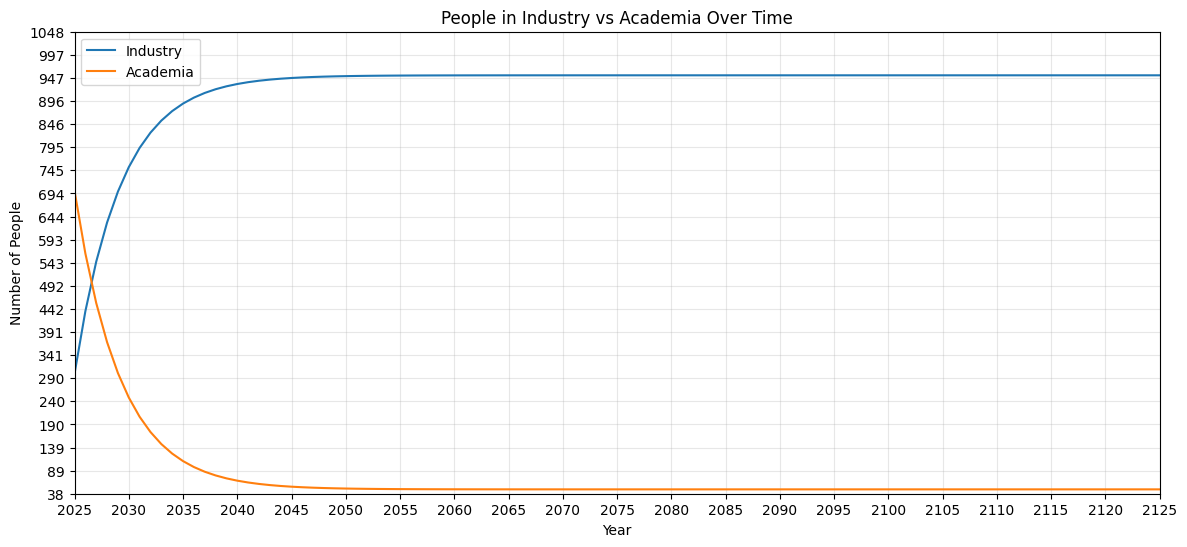

In [74]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(X_axis, Y_axis_industry, label='Industry')
plt.plot(X_axis, Y_axis_academia, label='Academia')

plt.xticks(X_ticks); plt.yticks(Y_ticks)
plt.ylim(Y_min, Y_max); plt.xlim(initialYear, finalYear)

plt.title('People in Industry vs Academia Over Time')
plt.xlabel('Year'); plt.ylabel('Number of People')

plt.legend(); plt.grid(alpha=0.3); plt.show()
